In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [4]:
import sweetviz as sv

In [5]:
eda_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [6]:
eda_report.show_html('sweet_report.html')

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.shape

(9240, 37)

In [9]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# using sweetviz we understand that there is select values which is usually a filter , we can replace it with NAN

In [11]:
df = df.replace('select',np.nan)

In [12]:
df.nunique()


Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [13]:
# we can observe that few columns have only 1 kind of values that will not be used for analysis so we can remove those columns.


In [14]:
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [15]:
# Normalization 

(df1.isnull().sum()/len(df1.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [16]:
# here we can see that few columns have more than 35% data blank we can directly remove those columns

In [17]:
(df1.isnull().sum()/len(df1.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [18]:
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)


In [19]:
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [20]:
(df2.isnull().sum()/len(df2.index))*100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [21]:
df2['Specialization'].value_counts()
df2 = df2.replace('Select',np.nan)
df2['Specialization'].value_counts()
(df2.isnull().sum()/len(df2.index))*100
df2['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [22]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [23]:
# we can change other country leads with outside of india 

In [24]:
def outside_india(x):
    out_india = ''
    if x=='India':
        out_india = 'India'
    elif x== 'not provided':
        out_india = 'not provided'
    else:
        out_india = 'Outside_India'
    return out_india



df2['Country'] = df2.apply(lambda x:outside_india(x['Country']), axis = 1)
df2['Country'].value_counts()

India            6492
not provided     2461
Outside_India     287
Name: Country, dtype: int64

In [25]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [27]:
100*(df3.isnull().sum()/len(df3.index))

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [28]:
# we can see prospect ID is completely distinct so we cannot do much analysis on that

df_final = df3.drop('Prospect ID',1)


In [29]:
df_final.shape

(9074, 21)

In [30]:
#Exploratory Data Ananlysis


In [31]:
#Univariate Analysis

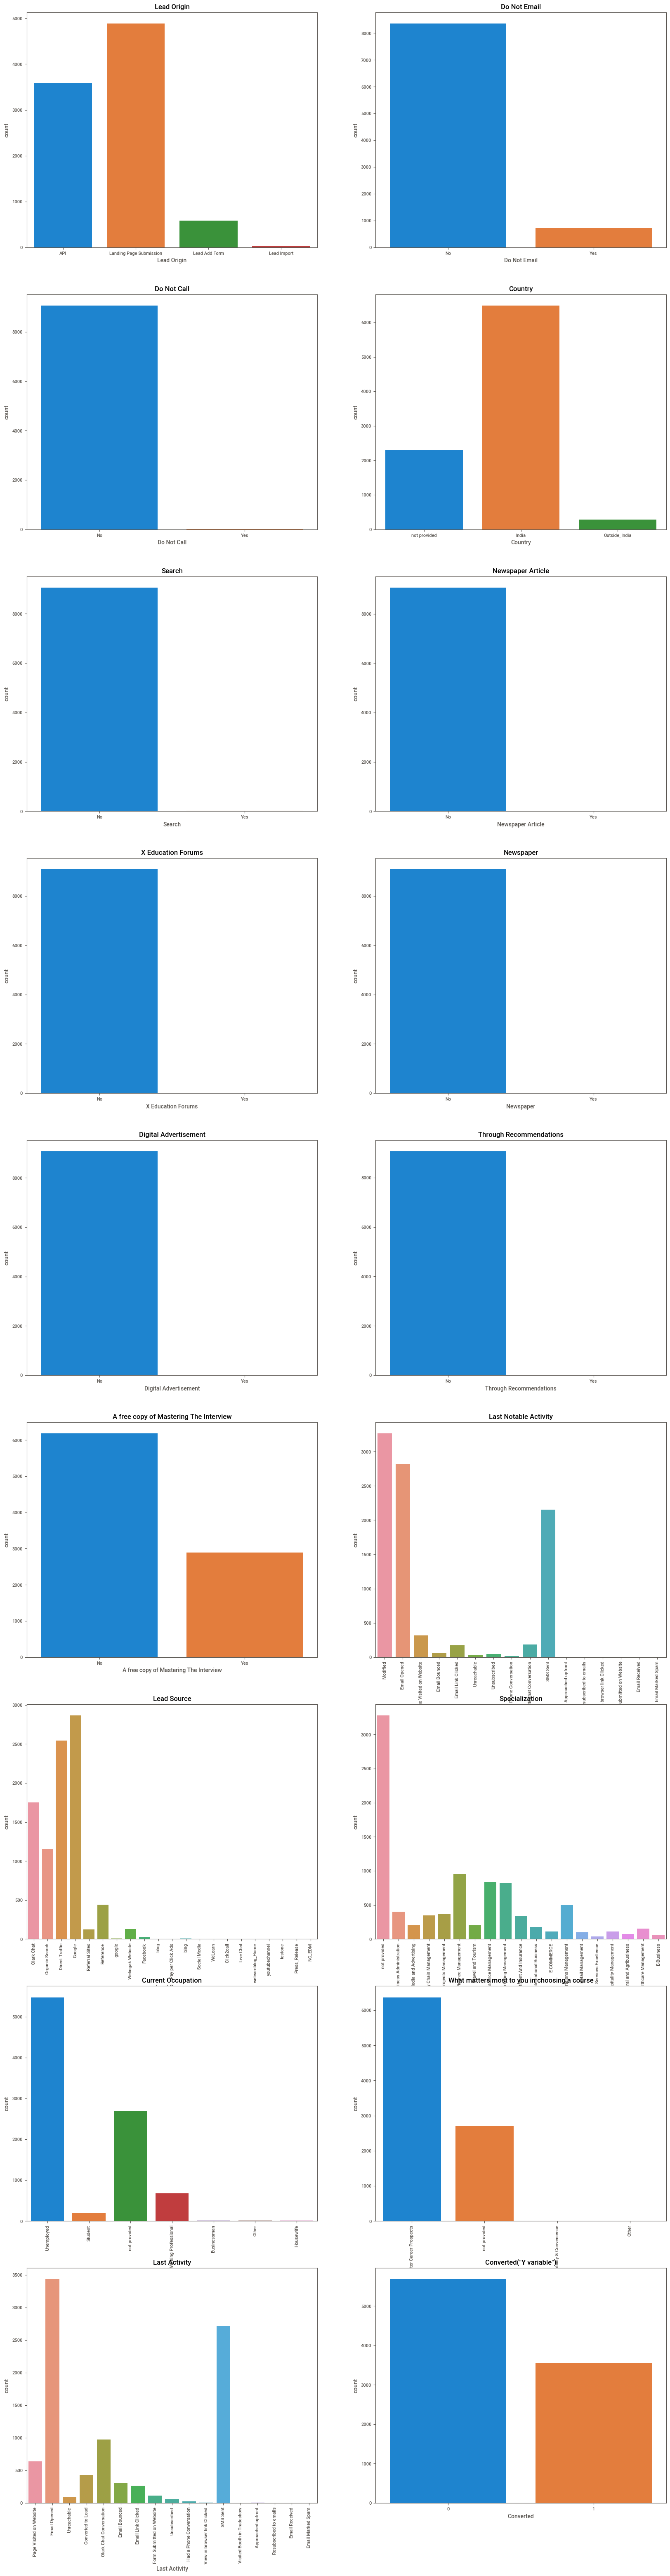

In [32]:
plt.figure(figsize = (20,80))

plt.subplot(9,2,1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(9,2,2)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(9,2,3)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(9,2,4)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(9,2,5)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(9,2,6)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(9,2,7)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(9,2,8)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(9,2,9)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(9,2,10)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(9,2,11)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(9,2,12)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(9,2,13)
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(9,2,14)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(9,2,15)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(9,2,16)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(9,2,17)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(9,2,18)
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')


plt.show()

In [33]:
# Ananlysis on Numerical Data

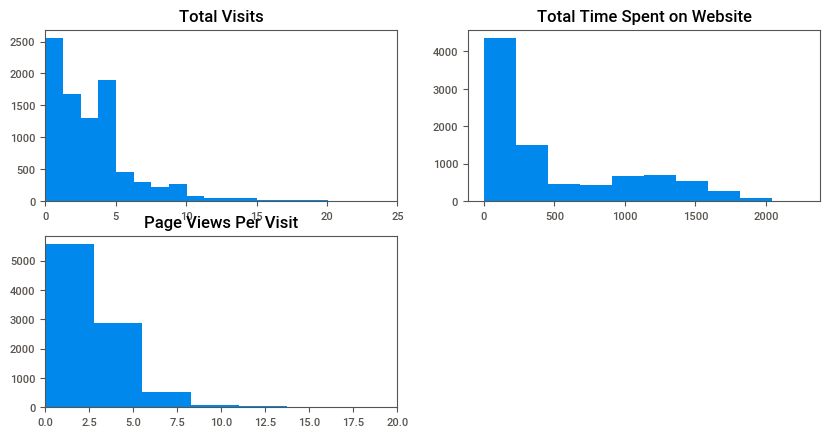

In [34]:
plt.figure(figsize = (10,5))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

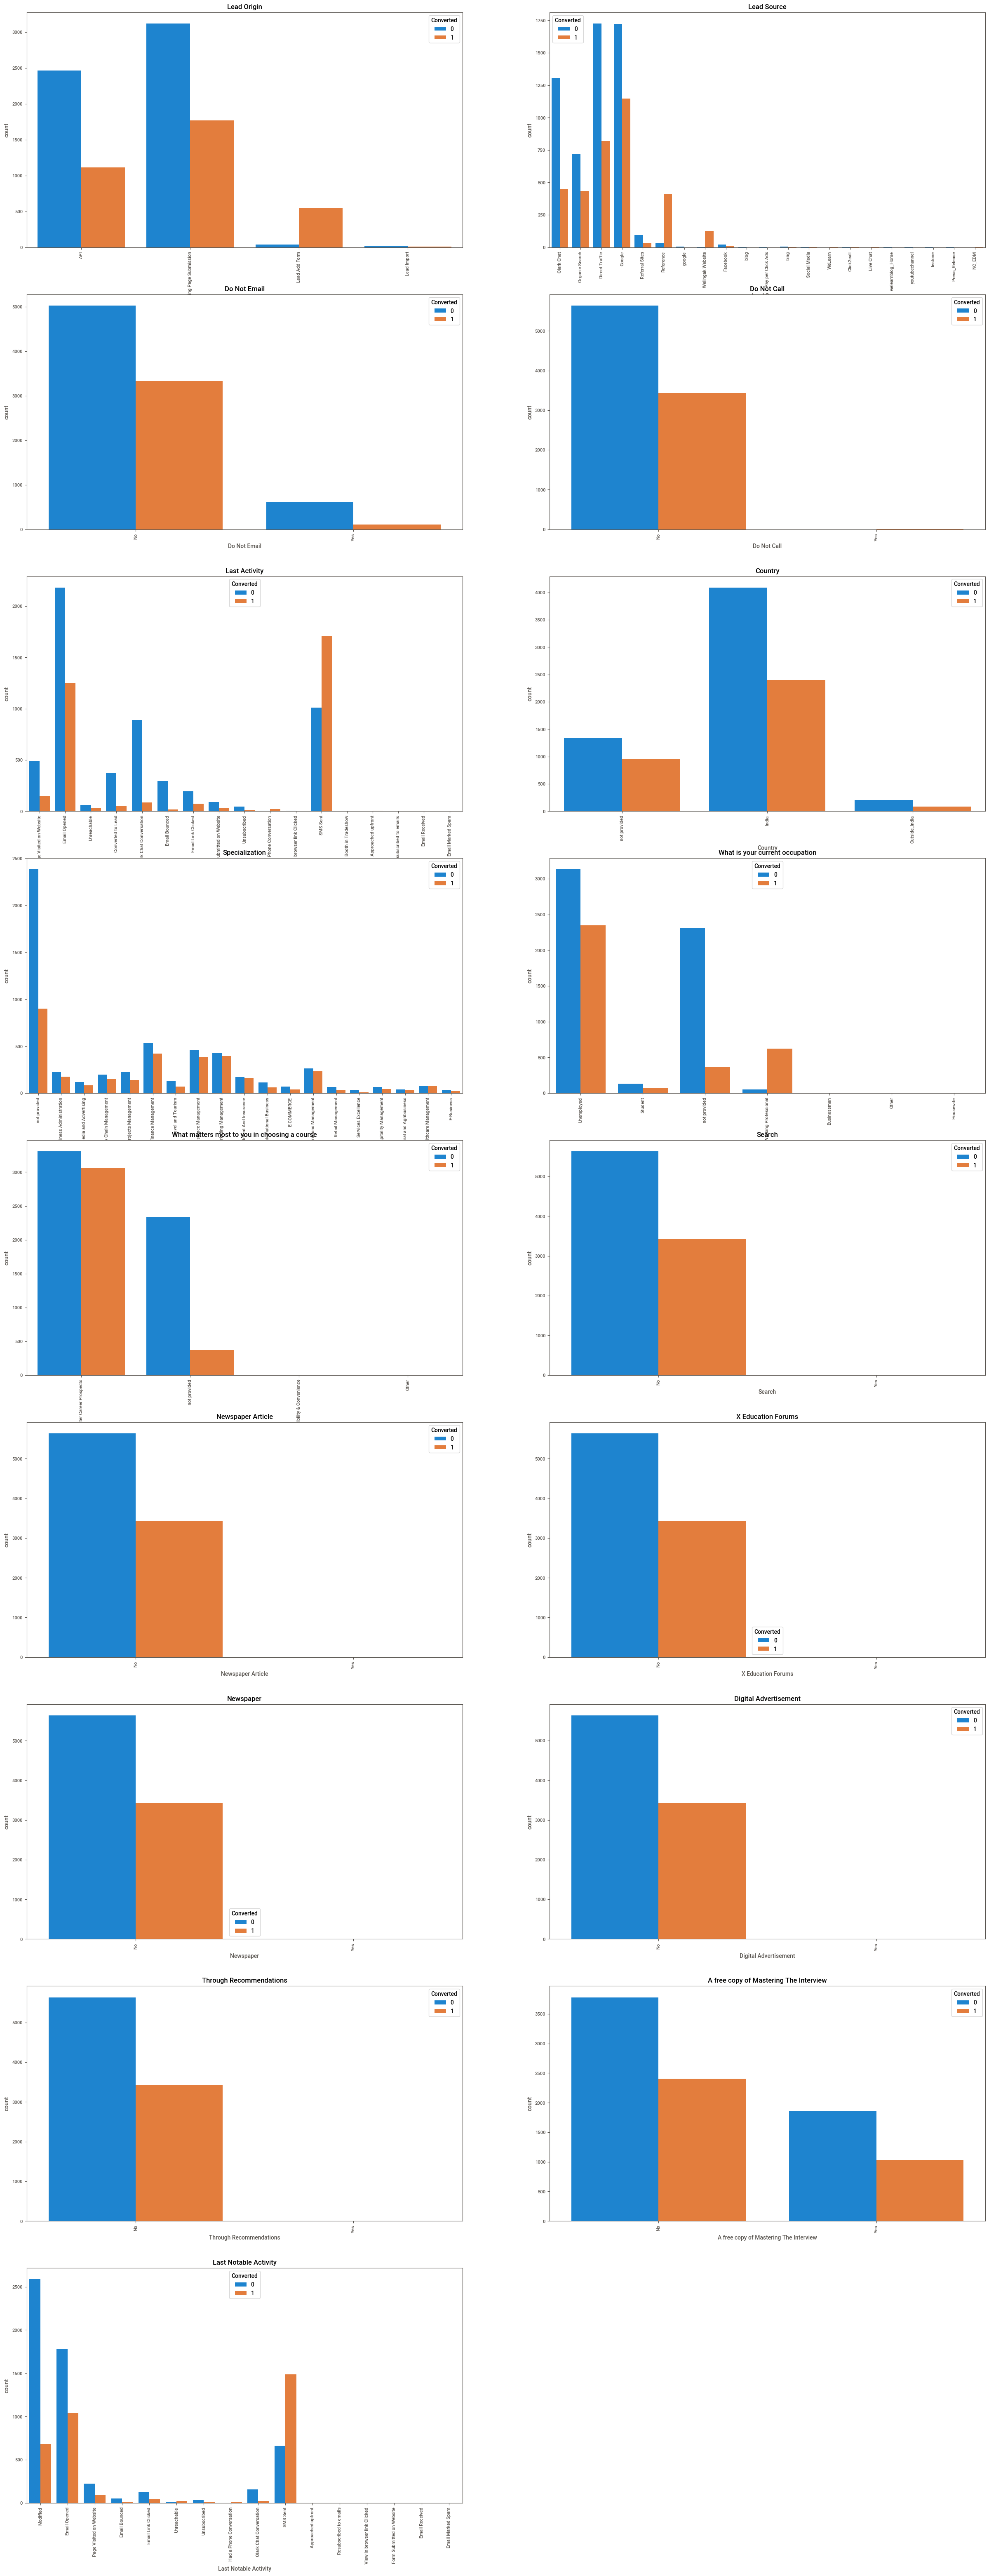

In [35]:
plt.figure(figsize = (30,80))

plt.subplot(9,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(9,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(9,2,3)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(9,2,4)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(9,2,5)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(9,2,6)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(9,2,7)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(9,2,8)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(9,2,9)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(9,2,10)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(9,2,11)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(9,2,12)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(9,2,13)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(9,2,14)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(9,2,15)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(9,2,16)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.subplot(9,2,17)
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

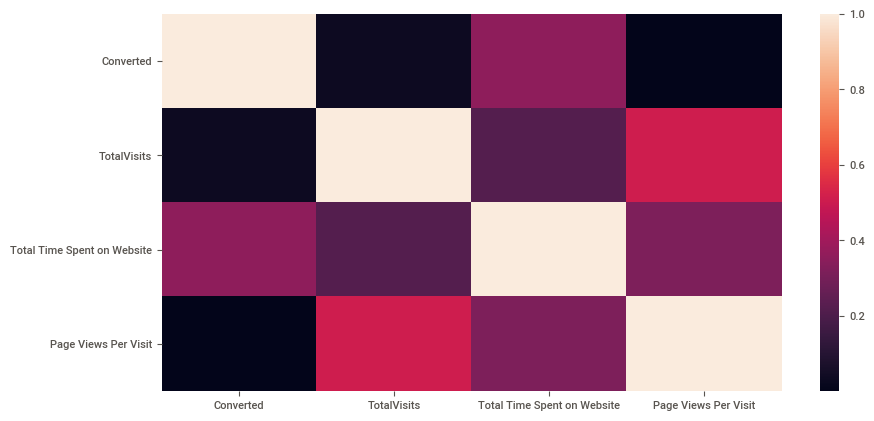

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr())
plt.show()

In [37]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


In [38]:
# Dummy Variable
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Outside_India,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,0,0,0,0,0,0,1,0,0,0


In [40]:
 df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


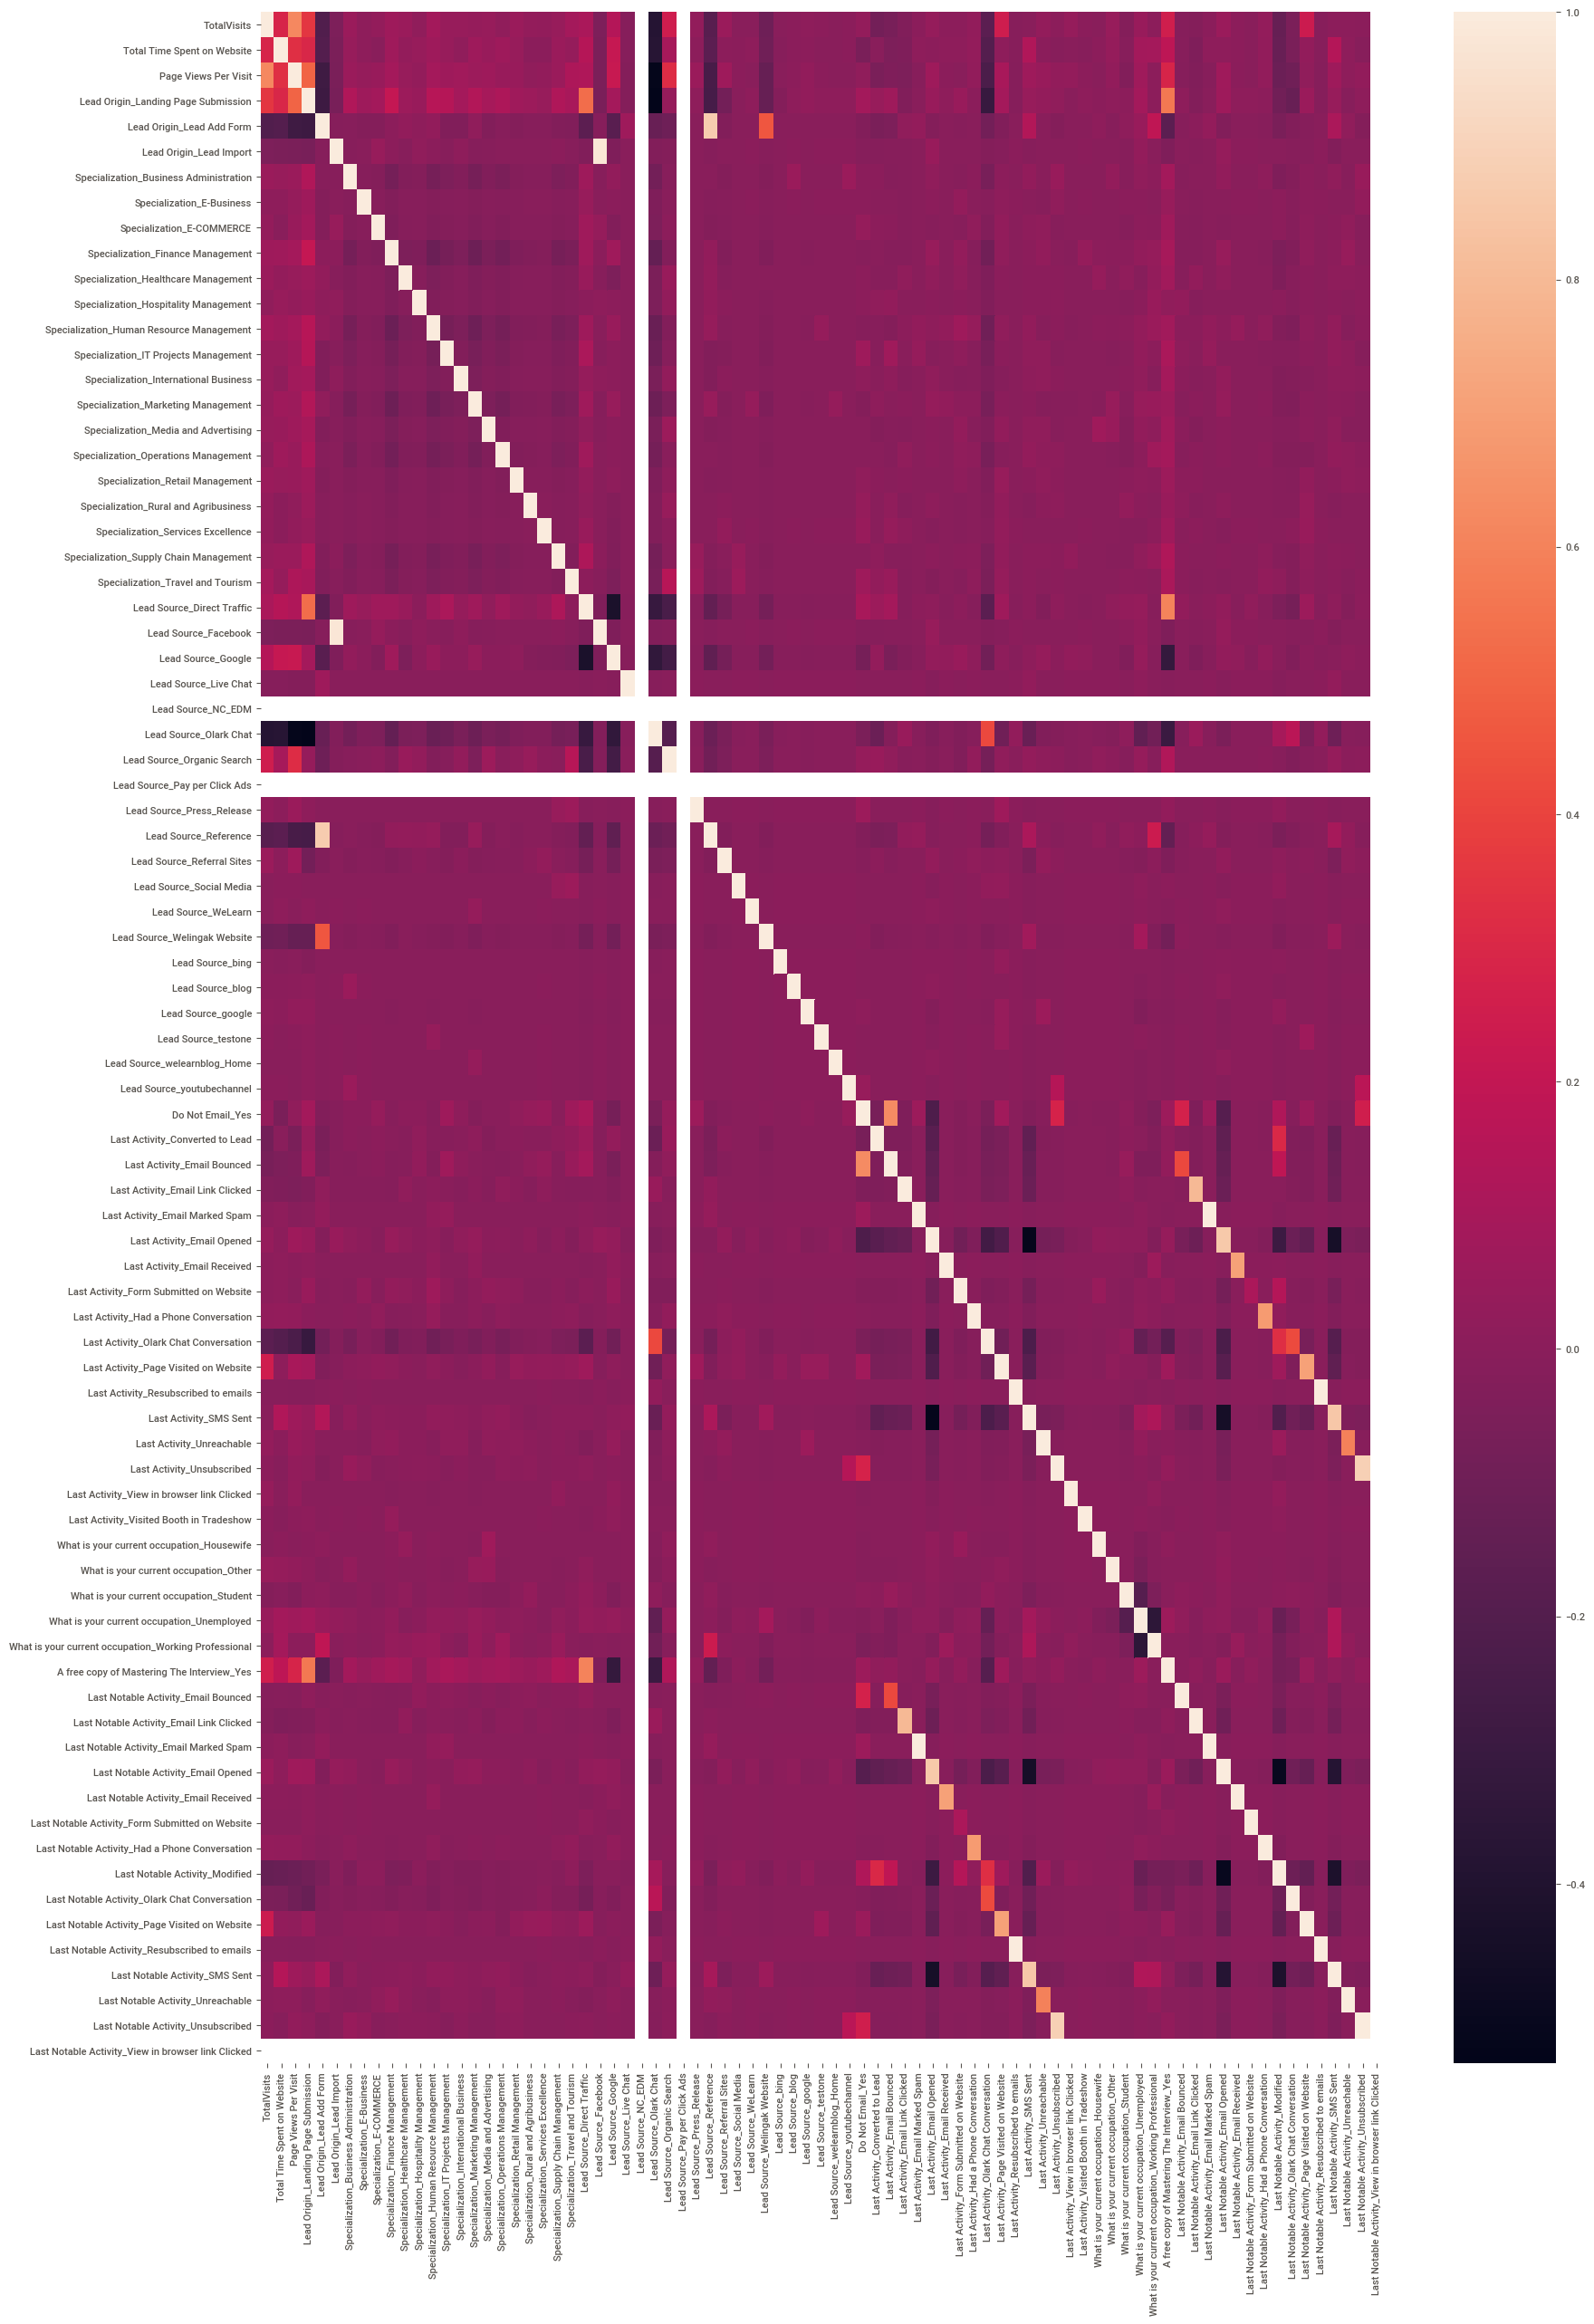

In [47]:
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

In [48]:
#allModelling

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False, 32),
 ('Specialization_E-COMMERCE', False, 23),
 ('Specialization_Finance Management', False, 30),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 45),
 ('Specialization_Human Resource Management', False, 31),
 ('Specialization_IT Projects Management', False, 28),
 ('Specialization_International Business', False, 38),
 ('Specialization_Marketing Management', False, 22),
 ('Specialization_Media and Advertising', False, 44),
 ('Specialization_Operations Management', False, 27),
 ('Specialization_Retail Management', False, 64),
 ('Specialization_Rural and Agribusiness', False, 24),
 ('Specialization_Serv

In [51]:
col = X_train.columns[rfe.support_]

In [52]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [53]:
X_train = X_train[col]

In [54]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
1289,0.014184,0.612676,0,0,0,0,0,0,0,0,0,1,0,0,0
3604,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0
5584,0.042553,0.751761,0,0,0,1,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0,0,0,1,0,0,0,0,0,1,0,0,0


In [55]:
import statsmodels.api as sm

In [56]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Tue, 18 Oct 2022   Deviance:                       5270.1
Time:                        09:06:00   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_Lead Add Form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_Olark Chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_Welingak Website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_Olark Chat Conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_SMS Sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_Housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_Other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_Student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_Unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_Working Professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_Had a Phone Conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_Unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


In [59]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [60]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Tue, 18 Oct 2022   Deviance:                       5285.6
Time:                        09:06:01   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_Lead Add Form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_Olark Chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_Welingak Website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_Olark Chat Conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_SMS Sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_Housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_Other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_Student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_Unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_Working Professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_Unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


In [62]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [63]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Tue, 18 Oct 2022   Deviance:                       5302.6
Time:                        09:06:03   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_Lead Add Form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_Olark Chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_Welingak Website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_Yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_Olark Chat Conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_SMS Sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_Other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_Student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_Unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_Working Professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_Unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.58
7,Last Activity_SMS Sent,1.53
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
11,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


In [65]:
X_train.drop('What is your current occupation_Other', axis = 1, inplace = True)

In [66]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.8
Date:                Tue, 18 Oct 2022   Deviance:                       5311.7
Time:                        09:06:05   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4345      0.113    -30.511      0.000      -3.655      -3.214
TotalVisits                                              5.7276      1.459      3.926      0.000       2.868       8.587
Total Time Spent on Website                              4.6142      0.166     27.753      0.000       4.288       4.940
Lead Origin_Lead Add Form                                3.7570      0.225     16.676      0.000       3.315       4.199
Lead Source_Olark Chat                                   1.5780      0.111     14.159      0.000       1.360       1.796
Lead Source_Welingak Website                             2.5828      1.033      2.501      0.012       0.558       4.607
Do Not Email_Yes                                        -1.4412      0.170     -8.470      0.000      -1.775      -1.108
Last Activity_Olark Chat Conversation                   -1.3929      0.167     -8.330      0.000      -1.721      -1.065
Last Activity_SMS Sent                                   1.2616      0.074     17.108      0.000       1.117       1.406
What is your current occupation_Student                  1.2218      0.226      5.401      0.000       0.778       1.665
What is your current occupation_Unemployed               1.1394      0.085     13.408      0.000       0.973       1.306
What is your current occupation_Working Professional     3.6555      0.204     17.914      0.000       3.256       4.055
Last Notable Activity_Unreachable                        1.8066      0.601      3.008      0.003       0.629       2.984
========================================================================================================================
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.29
1,Total Time Spent on Website,2.06
0,TotalVisits,1.84
2,Lead Origin_Lead Add Form,1.58
7,Last Activity_SMS Sent,1.53
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
10,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


In [68]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.648651
3604    0.135107
5584    0.238085
7679    0.135107
7563    0.495064
7978    0.778219
7780    0.169048
7863    0.982785
838     0.772810
708     0.149226
dtype: float64

In [69]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64865119, 0.135107  , 0.23808524, 0.135107  , 0.49506379,
       0.77821892, 0.16904797, 0.98278528, 0.77281013, 0.14922632])

In [70]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.648651
1,0,0.135107
2,0,0.238085
3,0,0.135107
4,0,0.495064


In [71]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.648651,1
1,0,0.135107,0
2,0,0.238085,0
3,0,0.135107,0
4,0,0.495064,0


In [72]:
from sklearn import metrics

In [73]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 748, 1708]], dtype=int64)

In [74]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

In [75]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [76]:
# sensitivety
TP/(TP+FN)

0.6954397394136808

In [77]:
#specifity
TN/(TN+FP)

0.8826700898587934

In [78]:
# optimise cut off


In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

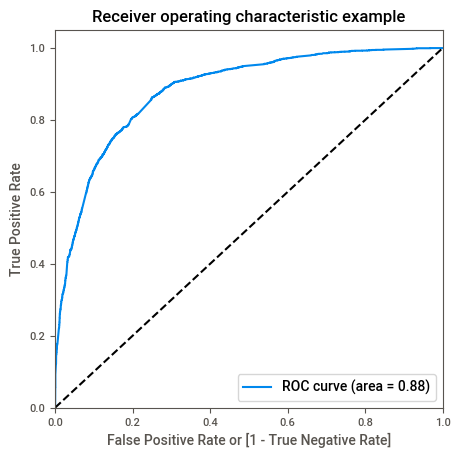

In [81]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [82]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0


In [83]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577547,0.983713,0.321438
0.2,0.2,0.758463,0.913681,0.660591
0.3,0.3,0.788380,0.872557,0.735302
0.4,0.4,0.809321,0.764658,0.837484
0.5,0.5,0.810266,0.695440,0.882670
0.6,0.6,0.802551,0.627443,0.912965
0.7,0.7,0.772792,0.501629,0.943774
0.8,0.8,0.753110,0.413274,0.967394
0.9,0.9,0.706345,0.259772,0.987933


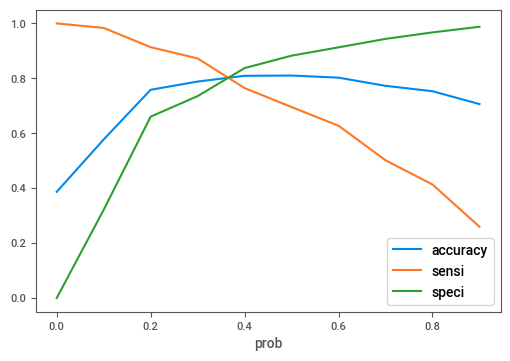

In [84]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [85]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0,1


In [86]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [87]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3126,  769],
       [ 481, 1975]], dtype=int64)

In [88]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [89]:
# Calculating the sensitivity
TP/(TP+FN)

0.8041530944625407

In [90]:
# Calculating the specificity
TN/(TN+FP)

0.8025673940949936

In [91]:
#Prediction on Test set

In [92]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [93]:
col = X_train.columns

In [94]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,1,0,0,1,0,0,1,0,0
8179,1.0,0.170213,0.148768,0,0,0,0,0,1,0,0,0,0
6236,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0,0,0,0,0,1,0,1,0,0


In [95]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.457908
1,1,0.839048
2,1,0.982785
3,1,0.878283
4,0,0.108296


In [96]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.457908,1
1,1,0.839048,1
2,1,0.982785,1
3,1,0.878283,1
4,0,0.108296,0
...,...,...,...
2718,1,0.108126,0
2719,0,0.374824,1
2720,0,0.135107,0
2721,1,0.821933,1


In [97]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8094013955196474

In [98]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1406,  338],
       [ 181,  798]], dtype=int64)

In [99]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [100]:
TP/(TP+FN)

0.81511746680286

In [101]:
TN/(TN+FP)

0.8061926605504587

In [102]:
# Precision recall

In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 748, 1708]], dtype=int64)

In [104]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7889145496535797

In [105]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6954397394136808

In [106]:
from sklearn.metrics import precision_recall_curve

In [107]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

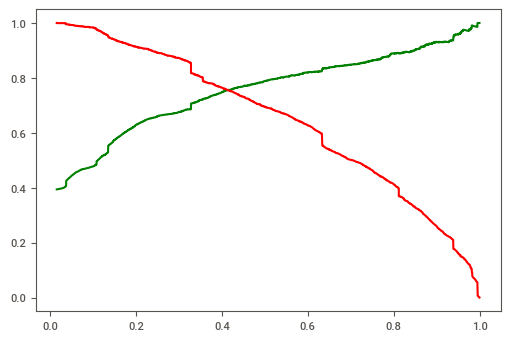

In [109]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.648651,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.238085,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.135107,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495064,0,1,1,1,1,1,0,0,0,0,0,1


In [113]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8112108329396945

In [114]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3289,  606],
       [ 593, 1863]], dtype=int64)

In [115]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [116]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7545565006075334

In [117]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7585504885993485

In [118]:
# Prediction on test set

In [119]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.457908
1,1,0.839048
2,1,0.982785
3,1,0.878283
4,0,0.108296


In [120]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.457908,1
1,1,0.839048,1
2,1,0.982785,1
3,1,0.878283,1
4,0,0.108296,0
...,...,...,...
2718,1,0.108126,0
2719,0,0.374824,0
2720,0,0.135107,0
2721,1,0.821933,1


In [121]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8149100257069408

In [122]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1472,  272],
       [ 232,  747]], dtype=int64)

In [123]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [124]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7330716388616291

In [125]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.763023493360572

#### Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

The total time spend on the Website.
Total number of visits.
When the lead source was:
a. Google
b. Direct traffic
c. Organic search
d. Welingak website
When the last activity was:
a. SMS
b. Olark chat conversation
When the lead origin is Lead add format.
When their current occupation is as a working professional.
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.